In [1]:
import pid_df

# Establish pid df object

This needs to be reduces to single file that is split into the train, test, and validation sets from the MC to ensure randomization of sets for reproducibility.

In [2]:
test_file = r'C:\Users\sebas\Documents\DataFrames\EpDF_Testing_25\DataFrame0\part-00000-6b976661-9ce5-4d16-8f87-c89392804828-c000.json'
train_file = r'C:\Users\sebas\Documents\DataFrames\EpDF_Training_50\DataFrame0\part-00000-192751e2-c8b5-4d54-941a-43d0306418a8-c000.json'
validate_file = r'C:\Users\sebas\Documents\DataFrames\EpDF_Validation_25\DataFrame0\part-00000-41bda35c-4483-4432-8961-75b3ea2cae2e-c000.json'

pid = pid_df.pid_df(train_file,test_file,validate_file,'ep',100) #Number at the end restricts the number of rows. Good for development.

In [3]:
test_file = r'C:/Users/sebas/Documents/DataFrames/PipDF_Testing_25/DataFrame0/part-00000-de25829b-9453-4241-a01e-e13d4afae17e-c000.json'
train_file = r'C:/Users/sebas/Documents/DataFrames/PipDF_Training_50/DataFrame0/part-00000-90ad08f7-4a17-4e20-b75d-9b6dcd456953-c000.json'
validate_file = r'C:/Users/sebas/Documents/DataFrames/PipDF_Validation_25/DataFrame0/part-00000-074f1af4-bf53-4b69-a9c2-4a4b3620dd2b-c000.json'

pid2 = pid_df.pid_df(train_file,test_file,validate_file,'pip',100) #Number at the end restricts the number of rows. Good for development.

# Test of shuffling object

Test of function for shuffling the objects. This will help with mixing different particle species randomly. 

In [4]:
print(len(pid.train))
print(pid.train.tail(1))
pid.shuffle_pid_df()
print(pid.train.tail(1))

100
    E1E9_FCAL  E9E25_FCAL  charge_true  dE_BCAL  dE_BCAL_L2  dE_BCAL_L3  \
99   0.957789    0.987531            1      0.0         0.0         0.0   

    dE_BCAL_L4  dE_BCAL_preshower   dE_FCAL   dEdx_ST     ...       mass_true  \
99         0.0                0.0  0.868289  0.002217     ...         0.00511   

          p   p_true  sigLong_BCAL  sigTrans_BCAL  sumU_FCAL  sumV_FCAL  \
99  0.61335  0.91765           0.0            0.0  16.427917  11.946965   

       theta  theta_true  particle_id  
99  0.107336    0.115223           ep  

[1 rows x 24 columns]
    E1E9_FCAL  E9E25_FCAL  charge_true   dE_BCAL  dE_BCAL_L2  dE_BCAL_L3  \
99   0.336826         0.0            1  2.093494    2.376267    0.044293   

    dE_BCAL_L4  dE_BCAL_preshower  dE_FCAL  dEdx_ST     ...       mass_true  \
99    0.948241           4.537411      0.0      0.0     ...         0.00511   

           p    p_true  sigLong_BCAL  sigTrans_BCAL  sumU_FCAL  sumV_FCAL  \
99  1.207053  1.402033      0.326797   

# Test object concatenation

Testing the concatenation of the objects with 25% of the second object. Prints before and after the addition.

In [5]:
print(len(pid.train))
print(pid.train.tail(10)['particle_id'])
pid.concat_pid_df(pid2,0.25)
print(len(pid.train))
print(pid.train.tail(10)['particle_id'])

100
90    ep
91    ep
92    ep
93    ep
94    ep
95    ep
96    ep
97    ep
98    ep
99    ep
Name: particle_id, dtype: object
125
97    pip
96    pip
68    pip
88    pip
48    pip
8     pip
58    pip
14    pip
71    pip
3     pip
Name: particle_id, dtype: object


# Plotting the data
Need to look at the raw data to assist in feature selection. Do not want to include highly correlated variables. 
## Single particle type
Look first at data for a single particle species.

C:\Users\sebas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:4505: RuntimeWarning: invalid value encountered in true_divide
  y = (y - ymin) / sy
C:\Users\sebas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:4519: RuntimeWarning: invalid value encountered in less
  bdist = (d1 < d2)
C:\Users\sebas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:4504: RuntimeWarning: invalid value encountered in true_divide
  x = (x - xmin) / sx


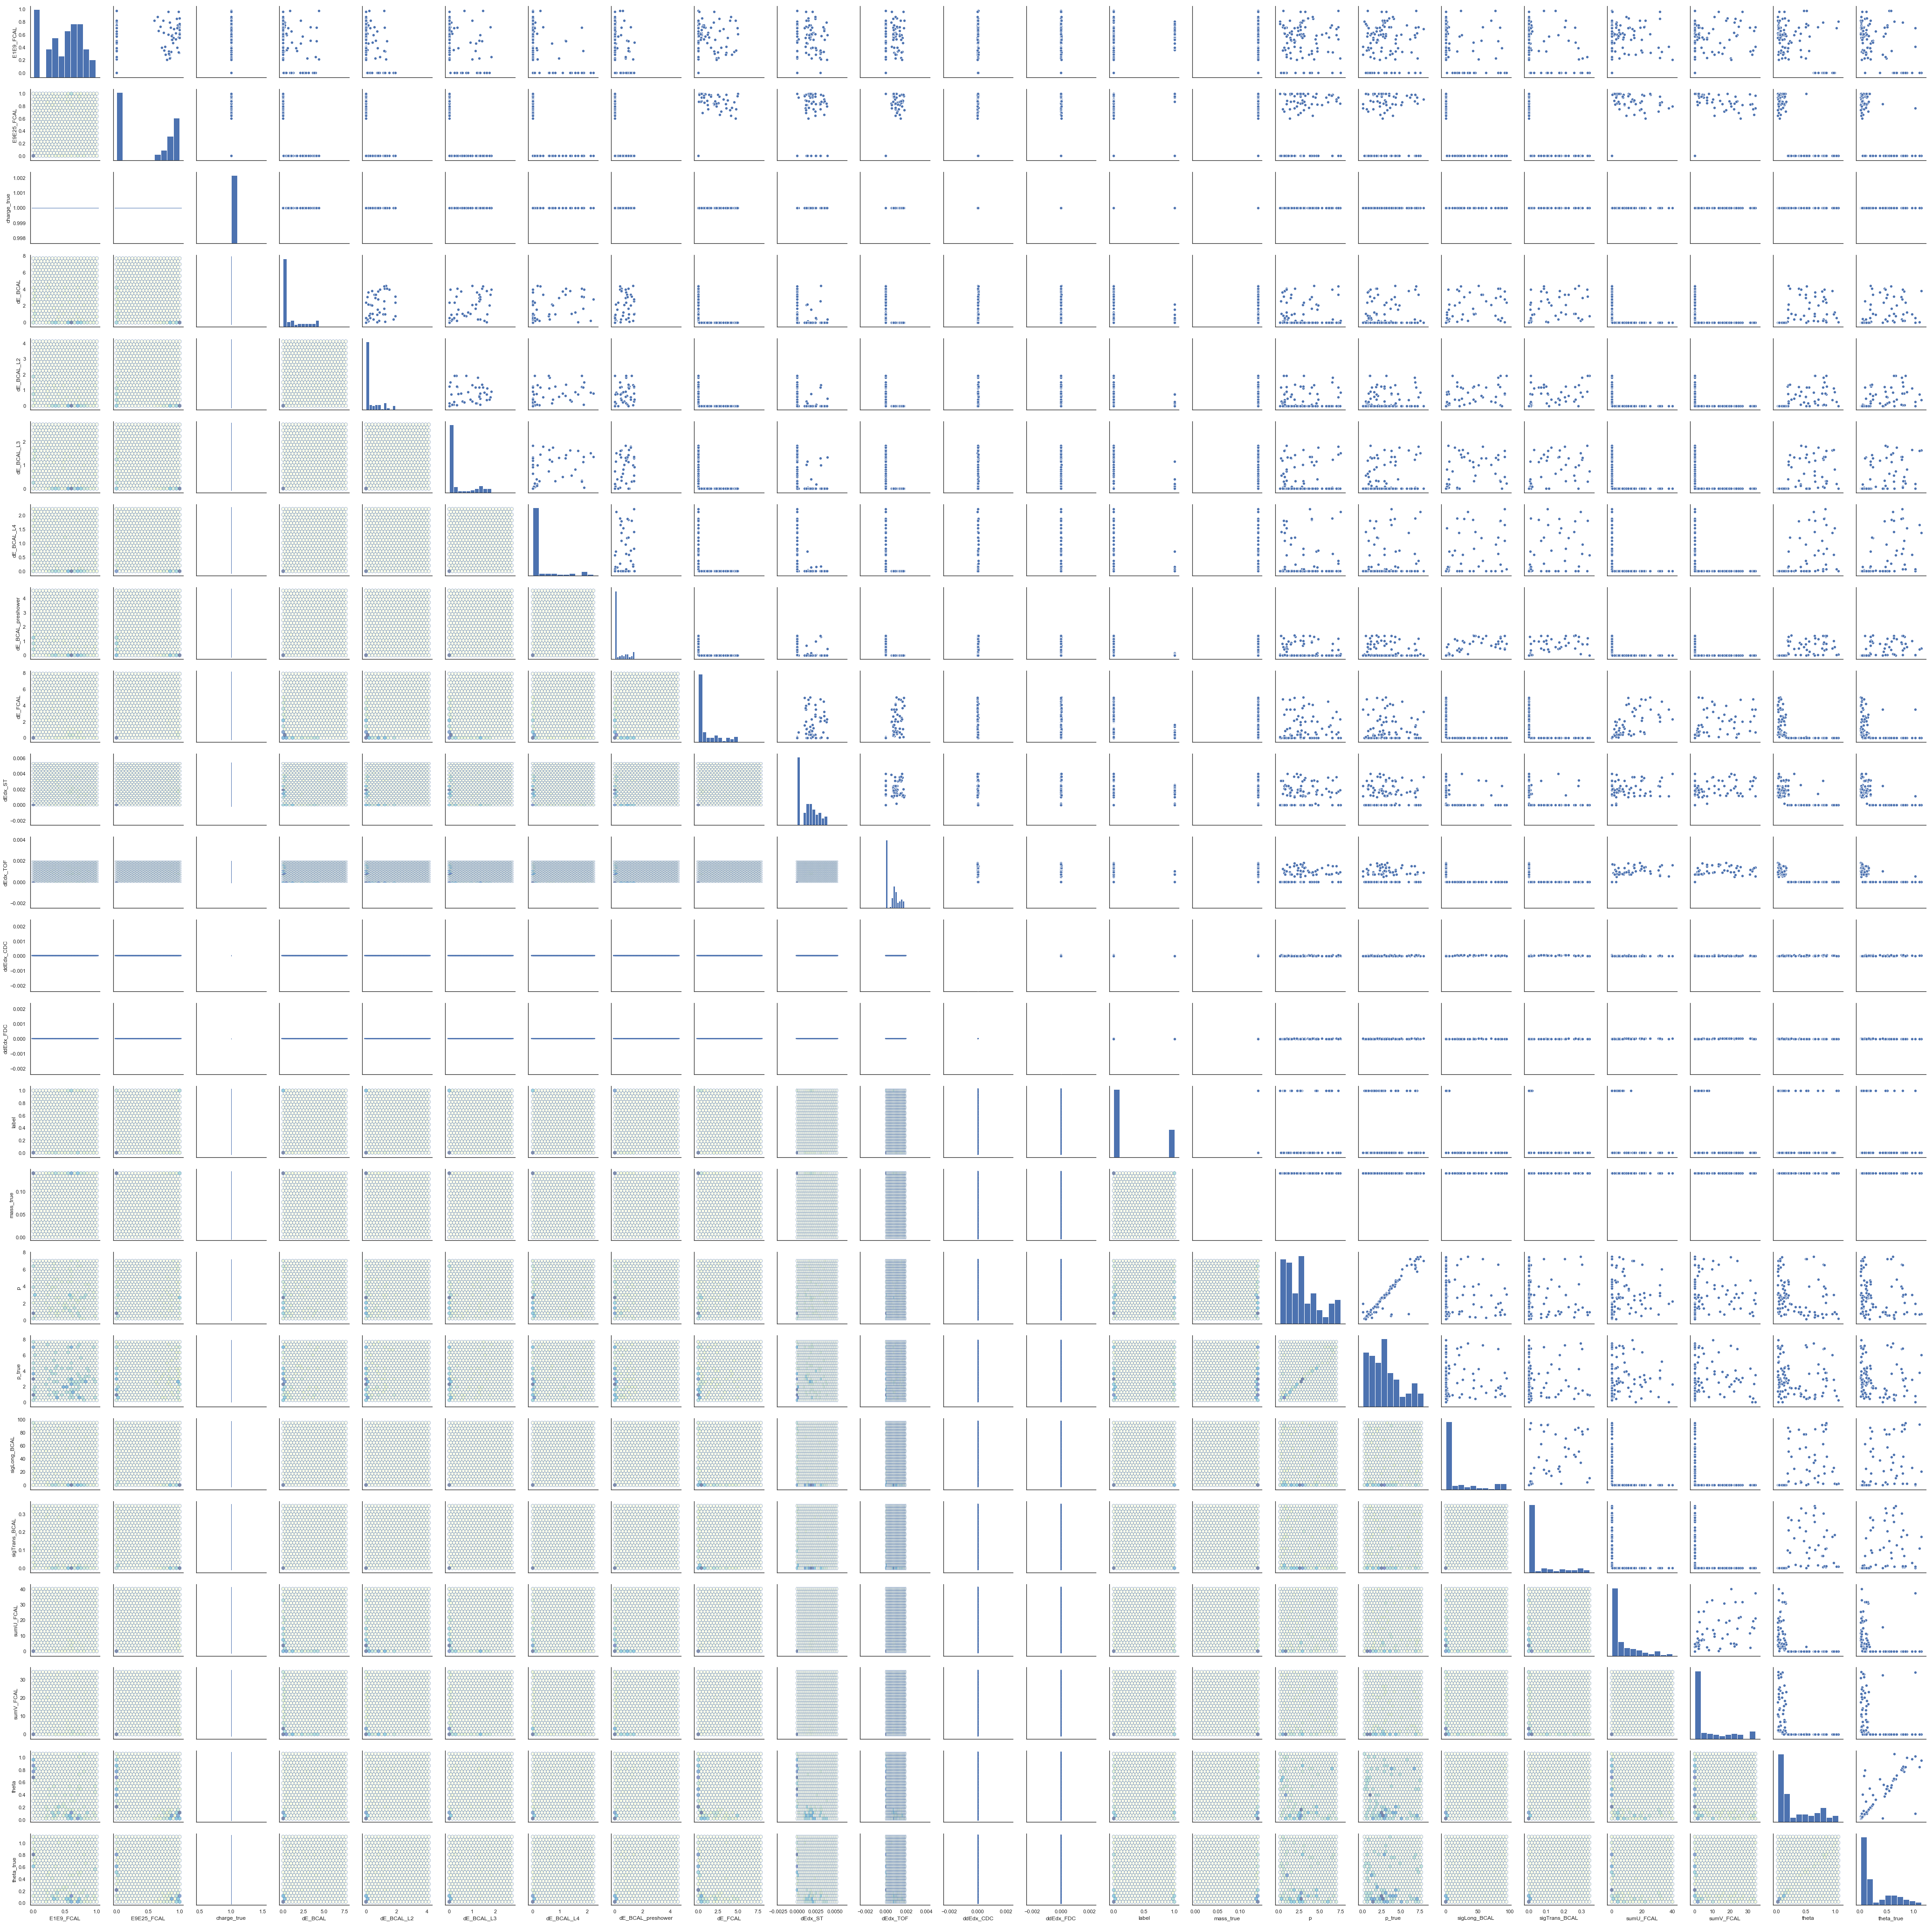

In [6]:
from pandas import read_json, concat, melt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def hexbin(x, y, max_series=None, min_series=None, **kwargs):
    #cmap = sns.light_palette(color, as_cmap=True)
    ax = plt.gca()
    xmin, xmax = min_series[x.name], max_series[x.name]
    ymin, ymax = min_series[y.name], max_series[y.name]
    plt.hexbin(x, y, gridsize=20, cmap='YlGnBu', extent=[xmin, xmax, ymin, ymax], **kwargs)

sns.set(style='white')
 
g = sns.PairGrid(pid2.train, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(hexbin, min_series=pid.train.min(), max_series=pid.train.max(),alpha=0.5)
g.map_diag(plt.hist)
g.savefig('Single_particle_features.png')

## Two particle types
Plot with more than one particle species to look at the affect of adding the small portion of another particle species contaminates the particle of interest.

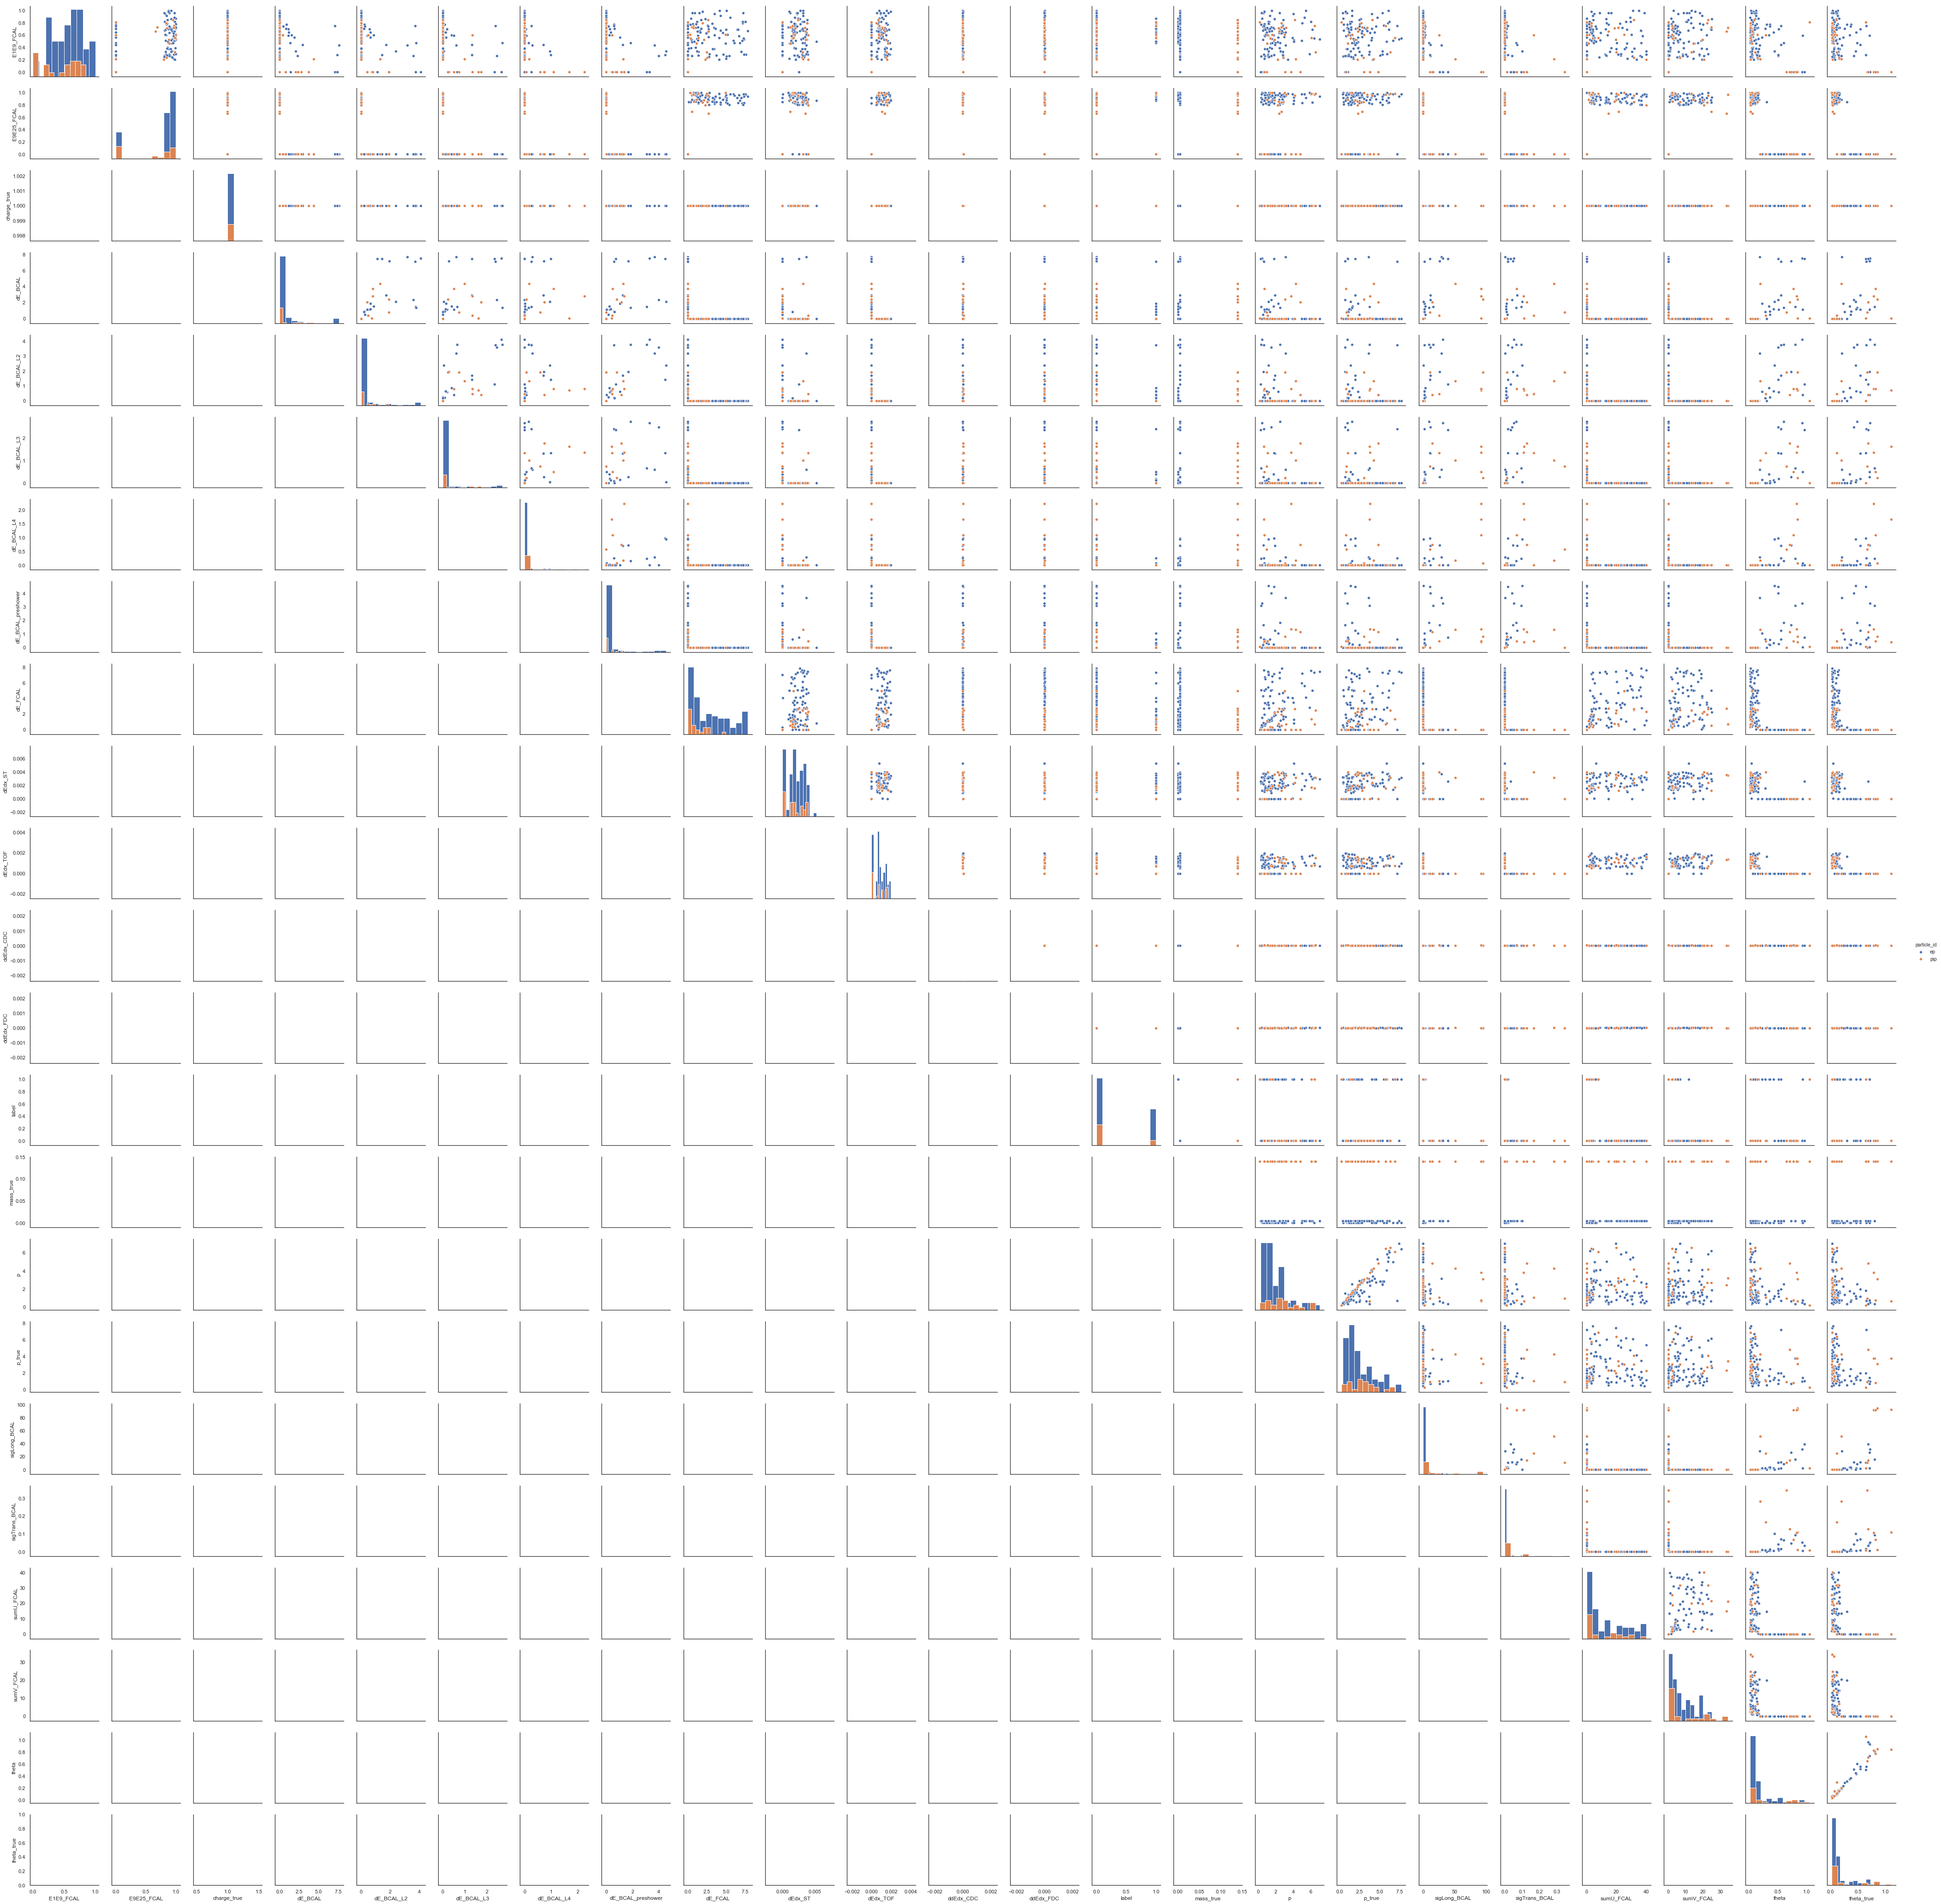

In [7]:
g = sns.PairGrid(pid.train, diag_sharey=False,hue='particle_id')
g.map_upper(sns.scatterplot)
#g.map_lower(hexbin, min_series=pid.train.min(), max_series=pid.train.max())
g.map_diag(plt.hist)
g = g.add_legend()
g.savefig('Two_particle_features.png')